# Classical Methods - Linear Discrminant Analysis

## in 5 simple steps

### LDA aims to project a dataset onto a lower-dimensional space with good class-separability in order to avoid overfitting and reduce computational costs

### LDA steps:
    
    1. Compute the d-dimensional mean vectors for the different classes from the dataset
    2. Compute the scatter matrices (in-between-class and within-class scatter matrix)
    3. Compute the eigenvectors and corresponding eigenvalues for the scatter matrices
    4. Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d×k dimensional matrix W
    5. Use this d×k eigenvector matrix to transform the samples onto the new subspace


## Loading the dataset

In [1]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [2]:
from sklearn.preprocessing import LabelEncoder

# split data table into data X and class labels y

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

## Histograms and feature selection
    
    To get a feeling for how the 3 different flower classes are distributes along the 4 different features, let us visualize them via histograms.

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import math

label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()

    plt.show()

<Figure size 800x600 with 4 Axes>

In [4]:
#Change into numerical values

print(y)

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

## 1. Compute the d-dimensional mean vectors for the different classes from the dataset
    Transformation of the data onto unit scale (mean=0 and variance=1)

In [5]:
mean_vectors = []
for cl in range(1,4):
    # SOLUTION
    mean_vectors.append(np.mean(X[y == cl], axis=0))
    # END SOLUTION
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [5.006 3.418 1.464 0.244]

Mean Vector class 2: [5.936 2.77  4.26  1.326]

Mean Vector class 3: [6.588 2.974 5.552 2.026]



## 2. Compute the scatter matrices (in-between-class and within-class scatter matrix)

### 2.1. Within-class scatter matrix Sw

In [38]:
S_W = np.zeros((4,4))
for cl,mv in zip(range(1,4), mean_vectors):
    # SOLUTION
    for i in range(len(X[y == cl])):
        S_W += (X[y == cl][i].reshape(4,1) - mv.reshape(4,1)) @ ((X[y == cl][i].reshape(4,1) - mv.reshape(4,1)).T)
    # END SOLUTION
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[38.9562 13.683  24.614   5.6556]
 [13.683  17.035   8.12    4.9132]
 [24.614   8.12   27.22    6.2536]
 [ 5.6556  4.9132  6.2536  6.1756]]


### 2.2. Between-class scatter matrix Sb

In [39]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):  
    # SOLUTION
    S_B += (mean_vec.reshape(4,1) - overall_mean.reshape(4,1)) @ ((mean_vec.reshape(4,1) - overall_mean.reshape(4,1)).T)

    # END SOLUTION

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 1.26424267 -0.39068     3.30329333  1.42726133]
 [-0.39068     0.219552   -1.121104   -0.449848  ]
 [ 3.30329333 -1.121104    8.73287467  3.73816267]
 [ 1.42726133 -0.449848    3.73816267  1.61208267]]


## 3. Compute the eigenvectors and corresponding eigenvalues for the scatter matrices

In [40]:
# SOLUTION
S_W_inv = np.linalg.inv(S_W)
eig_vals, eig_vecs = np.linalg.eig(S_W_inv @ S_B)
# END SOLUTION

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[-0.20490976]
 [-0.38714331]
 [ 0.54648218]
 [ 0.71378517]]
Eigenvalue 1: 6.45e-01

Eigenvector 2: 
[[ 0.00898234]
 [ 0.58899857]
 [-0.25428655]
 [ 0.76703217]]
Eigenvalue 2: 5.55e-03

Eigenvector 3: 
[[-0.28172942]
 [-0.17567188]
 [-0.23925461]
 [ 0.75520229]]
Eigenvalue 3: 1.21e-16

Eigenvector 4: 
[[-0.28172942]
 [-0.17567188]
 [-0.23925461]
 [ 0.75520229]]
Eigenvalue 4: 1.21e-16


##     4. Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d×k dimensional matrix W

In [41]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
0.645439155994597
0.0055513372768009024
1.392761921225068e-16
1.392761921225068e-16


### Explained variance: how much information (variance) can be attributed to each corresponding eigenvalues?

In [42]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 99.15%
eigenvalue 2: 0.85%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


In [43]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.20490976+0.j  0.00898234+0.j]
 [-0.38714331+0.j  0.58899857+0.j]
 [ 0.54648218+0.j -0.25428655+0.j]
 [ 0.71378517+0.j  0.76703217+0.j]]


## 5. Transformation onto the new feature space via W

In [44]:
# SOLUTION
X_lda = X @ matrix_w
# END SOLUTION

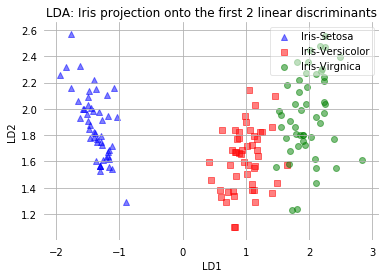

In [45]:
from matplotlib import pyplot as plt

def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

## Shortcut - LDA in scikit-learn

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

sklearn_lda = LinearDiscriminantAnalysis(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

In [28]:
def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

/home/bewoadmin/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


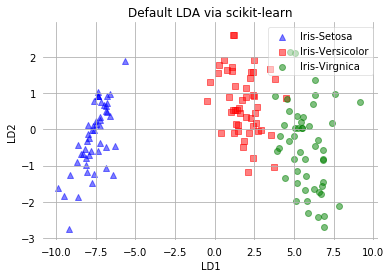

In [29]:
plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')